In [2]:
# Import packages
import numpy as np
import random as random
import matplotlib.pyplot as plt
import scipy

# from tqdm import tqdm

# load in better objects

from better import better, run_market, plot_returns

In [145]:
import seaborn as sns

In [3]:
def evaluate_markets(market_record):
    mp = np.array(market_record['price_history'])
    tp = np.array(market_record['gen_el'])
    mse = np.mean((mp-tp)**2)
    # cross-correlation isn't normalised, so this isn't a value between -1 and 1
    max_cor = np.max(scipy.signal.correlate(mp, tp, mode='full')[-len(tp):len(tp)]) # only taking the correlations when we have at least 50% overlap

    return mse, max_cor

In [ ]:
# set seed
np.random.seed(0)

results = []

# number of iterations for each set of parameters
n_iter_ = 30 

# Set initial input values to the betting market function
parameters = {'n_betters': 100, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': 100, # Time until election takes place (ie. time horizon of betting)
            'initial_price': 0.5, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': 0.1} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability

parameters.update({'betters': [better() for _ in range(parameters['n_betters'])]})

for _ in range(n_iter_):
    market_record = run_market(**parameters)
    mse, max_cor = evaluate_markets(market_record)
    results.append([mse, max_cor])

results = np.array(results)

Text(0.5, 1.0, 'Max Correlation')

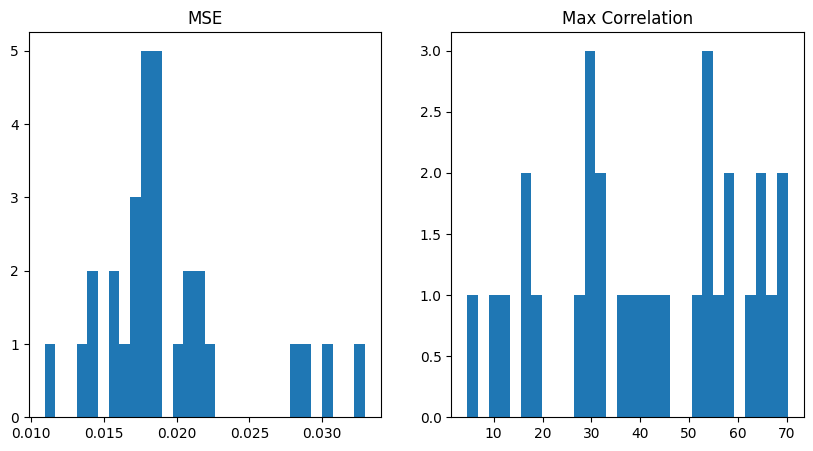

In [88]:
# set up the figure to plot the results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plot the results
ax[0].hist(results[:, 0], bins=30)
ax[0].set_title('MSE')
ax[1].hist(results[:, 1], bins=30)
ax[1].set_title('Max Correlation')

# Set up to look at:
- Increasing expertise (we expect this reduces error)
- Increasing bias
- Increasing the correlation of budget and bias (choose a value from previous plot)
- Increasing variance of budget
- Increasing average risk adversity
- Increasing stubbornness

In [93]:
results_dict = {}
n_iter_ = 30

In [140]:
# set seed
np.random.seed(0)

results = []

# Set initial input values to the betting market function
parameters = {'n_betters': 100, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': 100, # Time until election takes place (ie. time horizon of betting)
            'initial_price': 0.5, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': 0.1} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability


for e in np.arange(0,1.1,0.1):
    parameters.update({'betters': [better(expertise=e) for _ in range(parameters['n_betters'])]})
    for _ in range(n_iter_):
        market_record = run_market(**parameters)
        mse, max_cor = evaluate_markets(market_record)
        results.append([e, mse, max_cor])

results_dict['expertise'] = np.array(results)

In [141]:
# set seed
np.random.seed(0)

results = []

# Set initial input values to the betting market function
parameters = {'n_betters': 100, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': 100, # Time until election takes place (ie. time horizon of betting)
            'initial_price': 0.5, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': 0.1} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability


for b in np.arange(-0.9,1,0.1):
    parameters.update({'betters': [better(bias=b) for _ in range(parameters['n_betters'])]})
    for _ in range(n_iter_):
        market_record = run_market(**parameters)
        mse, max_cor = evaluate_markets(market_record)
        results.append([b, mse, max_cor])

results_dict['bias'] = np.array(results)

In [142]:
# set seed
np.random.seed(0)

results = []

# Set initial input values to the betting market function
parameters = {'n_betters': 100, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': 100, # Time until election takes place (ie. time horizon of betting)
            'initial_price': 0.5, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': 0.1} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability


for ra in np.arange(0,1.1,0.1):
    parameters.update({'betters': [better(risk_av=ra) for _ in range(parameters['n_betters'])]})
    for _ in range(n_iter_):
        market_record = run_market(**parameters)
        mse, max_cor = evaluate_markets(market_record)
        results.append([ra, mse, max_cor])

results_dict['risk_adversity'] = np.array(results)

In [143]:
# set seed
np.random.seed(0)

results = []

# Set initial input values to the betting market function
parameters = {'n_betters': 100, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': 100, # Time until election takes place (ie. time horizon of betting)
            'initial_price': 0.5, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': 0.1} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability


for s in np.arange(0,1.1,0.1):
    parameters.update({'betters': [better(stubbornness=s) for _ in range(parameters['n_betters'])]})
    for _ in range(n_iter_):
        market_record = run_market(**parameters)
        mse, max_cor = evaluate_markets(market_record)
        results.append([s, mse, max_cor])

results_dict['stubbornness'] = np.array(results)

In [132]:
# set seed
np.random.seed(0)

results = []

# Set initial input values to the betting market function
parameters = {'n_betters': N, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': 100, # Time until election takes place (ie. time horizon of betting)
            'initial_price': 0.5, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': 0.1} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability

for v in np.arange(0,500,50):
    for _ in range(n_iter_):
        budget_samples = np.clip(np.random.normal(500,v,N),0,None)
        parameters.update({'betters': [better(budget=budget_samples[i]) for i in range(parameters['n_betters'])]})
    
        market_record = run_market(**parameters)
        mse, max_cor = evaluate_markets(market_record)
        results.append([v, mse, max_cor])
        
results_dict['budget_variance'] = np.array(results)

In [ ]:
# Plots

Text(0.5, 1.0, 'Maxmimum cross-correlation')

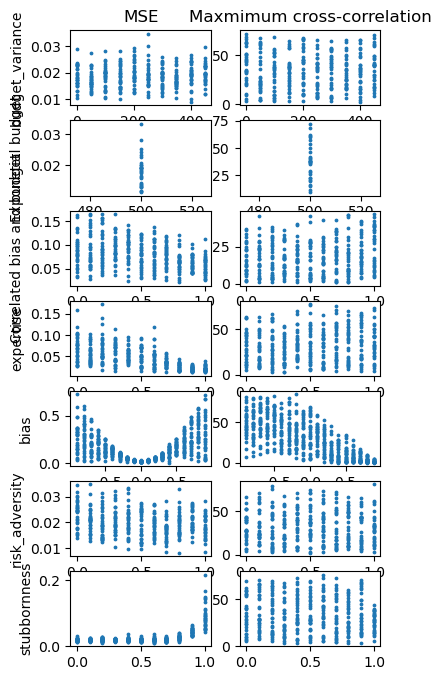

In [144]:
fig, ax = plt.subplots(len(results_dict.keys()),2,figsize=(4,8))
axs = ax.ravel()

i=0
for k in results_dict.keys():
#     arr=results_dict[k]
#     rows, row_pos = np.unique(arr[:, 0], return_inverse=True)
#     cols, col_pos = np.unique(arr[:, 1], return_inverse=True)
#     pivoted_arr3 = np.zeros((len(rows), len(cols)))
#     pivoted_arr3[row_pos, col_pos] = arr[:, 2]

#     axs[i].boxplot(pivoted_arr3.T,positions=rows)
    axs[i].scatter(x=results_dict[k][:,0],y=results_dict[k][:,1],s=3)
    axs[i].set_ylabel(k)
    
    i+=1
    axs[i].scatter(x=results_dict[k][:,0],y=results_dict[k][:,2],s=3)
    i+=1

axs[0].set_title('MSE')
axs[1].set_title('Maxmimum cross-correlation')

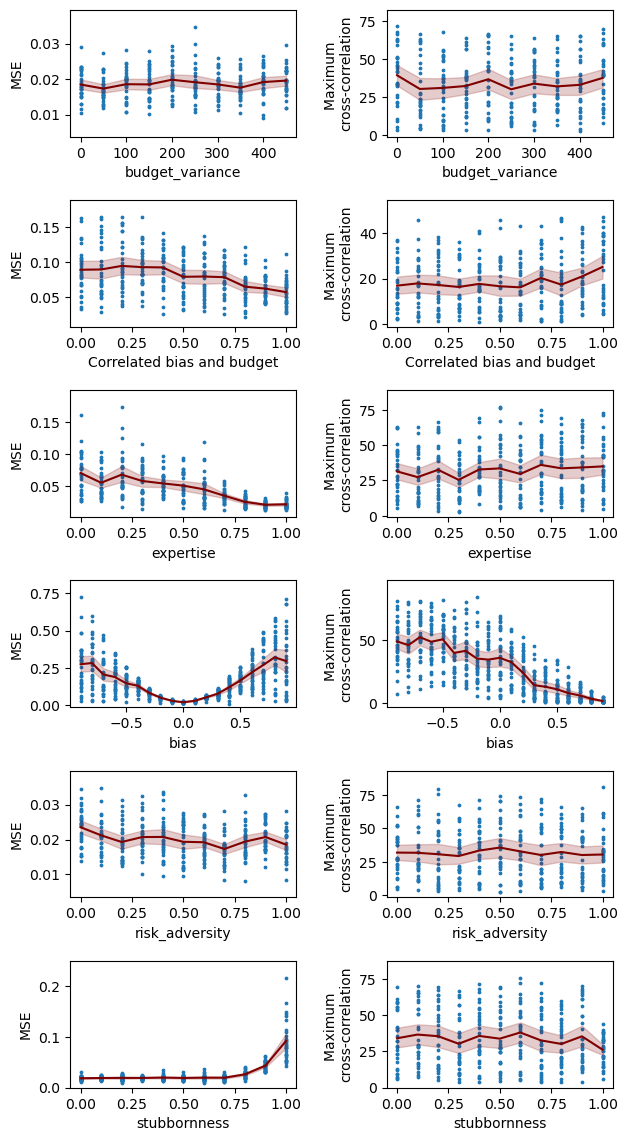

In [175]:
fig, ax = plt.subplots(len(results_dict.keys())-1,2,figsize=(7,14))
plt.subplots_adjust(hspace=0.5,wspace=0.4)
axs = ax.ravel()

i=0
for k in results_dict.keys():
    if k=='Exponetial budget':
        continue
#     arr=results_dict[k]:
#     rows, row_pos = np.unique(arr[:, 0], return_inverse=True)
#     cols, col_pos = np.unique(arr[:, 1], return_inverse=True)
#     pivoted_arr3 = np.zeros((len(rows), len(cols)))
#     pivoted_arr3[row_pos, col_pos] = arr[:, 2]

#     axs[i].boxplot(pivoted_arr3.T,positions=rows)
    axs[i].scatter(x=results_dict[k][:,0],y=results_dict[k][:,1],s=3)
    sns.lineplot(x=results_dict[k][:,0],y=results_dict[k][:,1],ax=axs[i],c='maroon')
    axs[i].set_xlabel(k)
    axs[i].set_ylabel('MSE')
    y1,y2=axs[i].get_ylim()
    axs[i].set_ylim(0.5*y1,1.1*y2)
    
    i+=1
    axs[i].scatter(x=results_dict[k][:,0],y=results_dict[k][:,2],s=3)
    sns.lineplot(x=results_dict[k][:,0],y=results_dict[k][:,2],ax=axs[i],c='maroon')
    y1,y2=axs[i].get_ylim()
    axs[i].set_ylim(0.9*y1,1.1*y2)
    axs[i].set_xlabel(k)
    axs[i].set_ylabel('Maximum \ncross-correlation')
    i+=1

# axs[0].set_title('MSE')
# axs[1].set_title('Maxmimum cross-correlation')
plt.savefig('results_combined.pdf')

In [180]:
import pickle

with open('simulation_results.json', 'wb') as fp:
    pickle.dump(results_dict, fp)

# Case with a few very large betters

## firsty, what happens when the variance in the budget increases?

In [134]:
N = 100

In [135]:
# set seed
np.random.seed(0)

results = []

# Set initial input values to the betting market function
parameters = {'n_betters': N, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': 100, # Time until election takes place (ie. time horizon of betting)
            'initial_price': 0.5, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': 0.1} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability

lam = 500
for _ in range(n_iter_):
    budget_samples = np.random.exponential(lam,N)
    parameters.update({'betters': [better(budget=budget_samples[i]) for i in range(parameters['n_betters'])]})

    market_record = run_market(**parameters)
    mse, max_cor = evaluate_markets(market_record)
    results.append([lam, mse, max_cor])
    
results_dict['Exponetial budget'] = np.array(results)

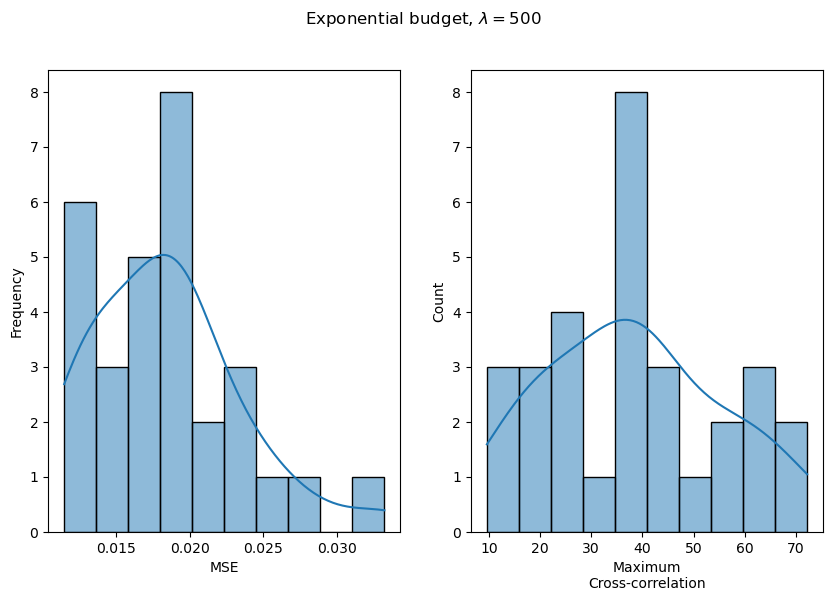

In [197]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
sns.histplot(results_dict['Exponetial budget'] [:,1],ax=axs[0],kde=True,bins=10)
sns.histplot(results_dict['Exponetial budget'] [:,2],ax=axs[1],kde=True,bins=10)

plt.suptitle(r'Exponential budget, $\lambda=500$')
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('MSE')
axs[1].set_xlabel('Maximum\nCross-correlation')
plt.savefig('exponential_budget.pdf')

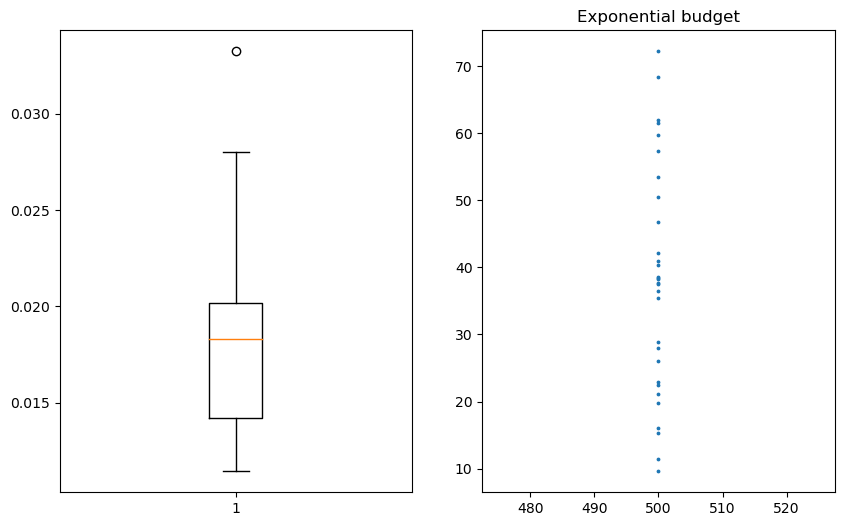

In [184]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].boxplot(results_dict['Exponetial budget'] [:,1])
plt.title('Exponential budget')
axs[1].scatter(x=results_dict['Exponetial budget'] [:,0],y=results_dict['Exponetial budget'] [:,2],s=3)

# Case with correlated bias and budget

(array([107., 218., 220., 240., 137.,  53.,  19.,   4.,   1.,   1.]),
 array([0.00910435, 0.10446625, 0.19982816, 0.29519006, 0.39055196,
        0.48591387, 0.58127577, 0.67663767, 0.77199958, 0.86736148,
        0.96272339]),
 <BarContainer object of 10 artists>)

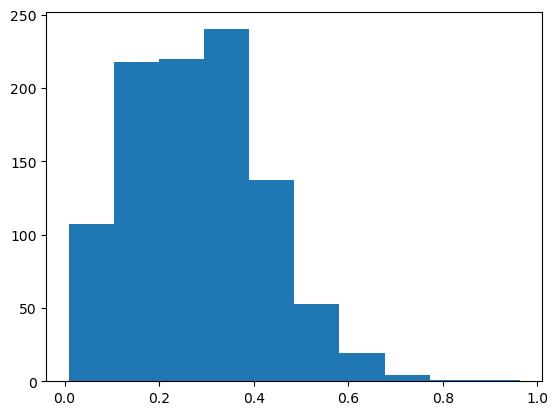

In [137]:
alpha=0.6
N=1000
budget_samples = np.random.exponential(lam,N)
bias_samples = alpha * np.clip(budget_samples / np.max(budget_samples),0,1) + (1-alpha) * np.random.uniform(0,1,N)
plt.hist(bias_samples)

In [138]:
# set seed
np.random.seed(0)

results = []

# Set initial input values to the betting market function
parameters = {'n_betters': N, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': 100, # Time until election takes place (ie. time horizon of betting)
            'initial_price': 0.5, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': 0.1} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability

lam = 500
for alpha in np.arange(0,1.1,0.1):
    for _ in range(n_iter_):
        budget_samples = np.random.exponential(lam,N)
        bias_samples = alpha * np.clip(budget_samples / np.max(budget_samples),0,1) + (1-alpha) * np.random.uniform(0,1,N)
        parameters.update({'betters': [better(budget=budget_samples[i], bias = bias_samples[i]) for i in range(parameters['n_betters'])]})

        market_record = run_market(**parameters)
        mse, max_cor = evaluate_markets(market_record)
        results.append([alpha, mse, max_cor])
    
results_dict['Correlated bias and budget'] = np.array(results)

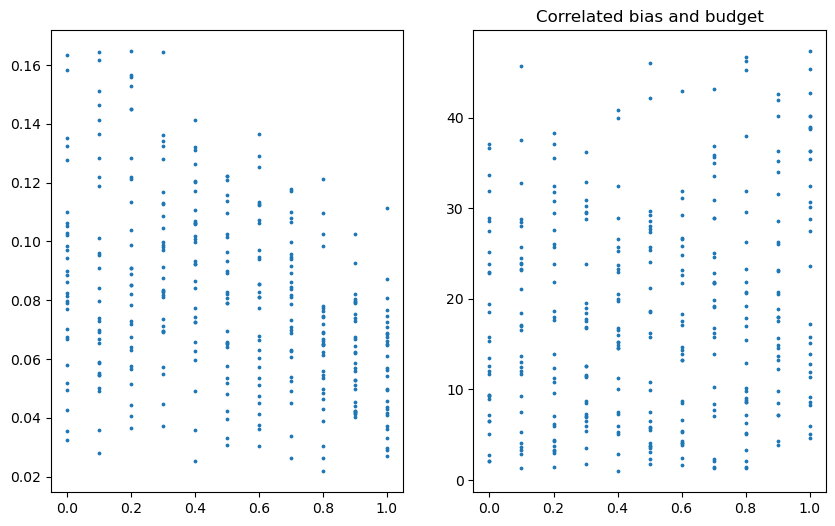

In [139]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].scatter(x=results_dict['Correlated bias and budget'] [:,0],y=results_dict['Correlated bias and budget'] [:,1],s=3)
plt.title('Correlated bias and budget')
axs[1].scatter(x=results_dict['Correlated bias and budget'] [:,0],y=results_dict['Correlated bias and budget'] [:,2],s=3)

# Making last plots

In [229]:
mv=0
N=1000

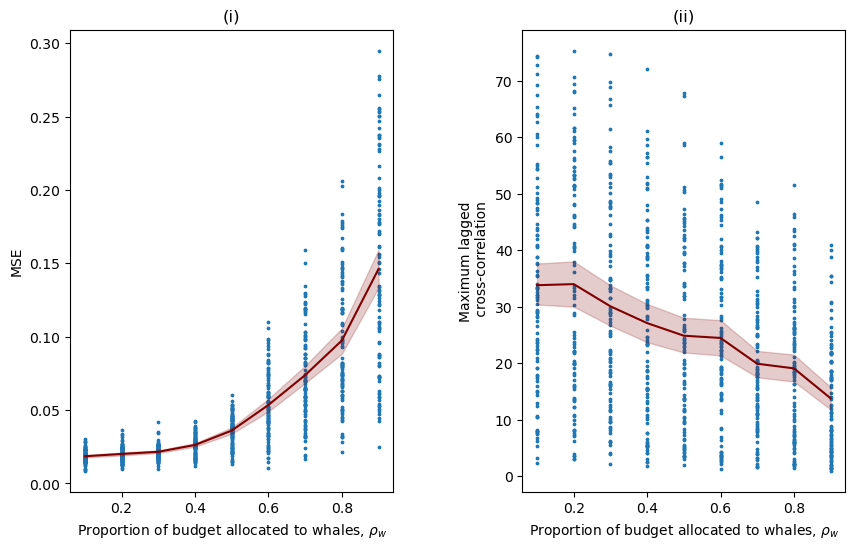

In [230]:

r_arr = np.array(results)
with open(f'whale_{mv}_{N}.pkl', 'rb') as f:
    results = pickle.load(f)

# modify the simulation to multiprocess
fig, axs = plt.subplots(1,2,figsize=(10,6))
plt.subplots_adjust(wspace=0.4)
axs[0].scatter(x=results[:,0],y=results[:,1],s=3)
sns.lineplot(x=results[:,0],y=results[:,1],c='maroon',ax=axs[0])
axs[0].set_ylabel('MSE')
axs[0].set_xlabel(r'Proportion of budget allocated to whales, $\rho_w$')
# plt.suptitle(f'Single whale with internal valuation of {mv}')
axs[0].set_title('(i)')
axs[1].set_title('(ii)')
axs[1].scatter(x=results[:,0],y=results[:,2],s=3)
sns.lineplot(x=results[:,0],y=results[:,2],c='maroon',ax=axs[1])
axs[1].set_ylabel('Maximum lagged\n cross-correlation')
axs[1].set_xlabel(r'Proportion of budget allocated to whales, $\rho_w$')

plt.savefig(f'whales_{mv}_{N}.pdf', bbox_inches='tight')